In [1]:
import vaex
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
from scipy.stats import norm, poisson
from scipy.optimize import curve_fit
from os.path import join, abspath
import sys
from os import pardir, mkdir
from tqdm import tqdm
import corner

In [2]:
root_dir = abspath(pardir)
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/3_Vertical_Velocity',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [16]:
from utils import safe_mkdir, style, plot_corner, get_params

In [5]:
style()

In [6]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [8]:
vel_dir = join(root_data_dir, "MCMC-no", "vel", "data")
vel_dir

'/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data'

In [9]:
name = "PHI"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/PHI already exist. Good to go!


In [41]:
files = glob(join(vel_dir, "*.npy"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(-0.10)_(0.11).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.11)_(0.16).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.16)_(0.20).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.20)_(0.24).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.24)_(0.27).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.27)_(0.29).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.29)_(0.31).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.31)_(0.33).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.33)_(0.35).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.35)_(0.37).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.37)_(0.38).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.38)_(0.40).npy']

In [42]:
names = [f.split("/")[-1].replace("chain-", "") for f in files]
names

['(-0.10)_(0.11).npy',
 '(0.11)_(0.16).npy',
 '(0.16)_(0.20).npy',
 '(0.20)_(0.24).npy',
 '(0.24)_(0.27).npy',
 '(0.27)_(0.29).npy',
 '(0.29)_(0.31).npy',
 '(0.31)_(0.33).npy',
 '(0.33)_(0.35).npy',
 '(0.35)_(0.37).npy',
 '(0.37)_(0.38).npy',
 '(0.38)_(0.40).npy']

In [13]:
import re

# capture string within parenthesis ()

c = [re.findall(r'\((.*?)\)', name) for name in names]
c0 = np.array([float(ci[0]) for ci in c])
c1 = np.array([float(ci[1]) for ci in c])
c = (c0+c1)/2
c

array([0.005, 0.135, 0.18 , 0.22 , 0.255, 0.28 , 0.3  , 0.32 , 0.34 ,
       0.36 , 0.375, 0.39 ])

ANJING (60000, 5)
TAI ['$w_0$', '$\\log \\sigma_{w,1}$', '$\\log \\sigma_{w,2}$', '$\\log a_1$', '$\\log a_2$']


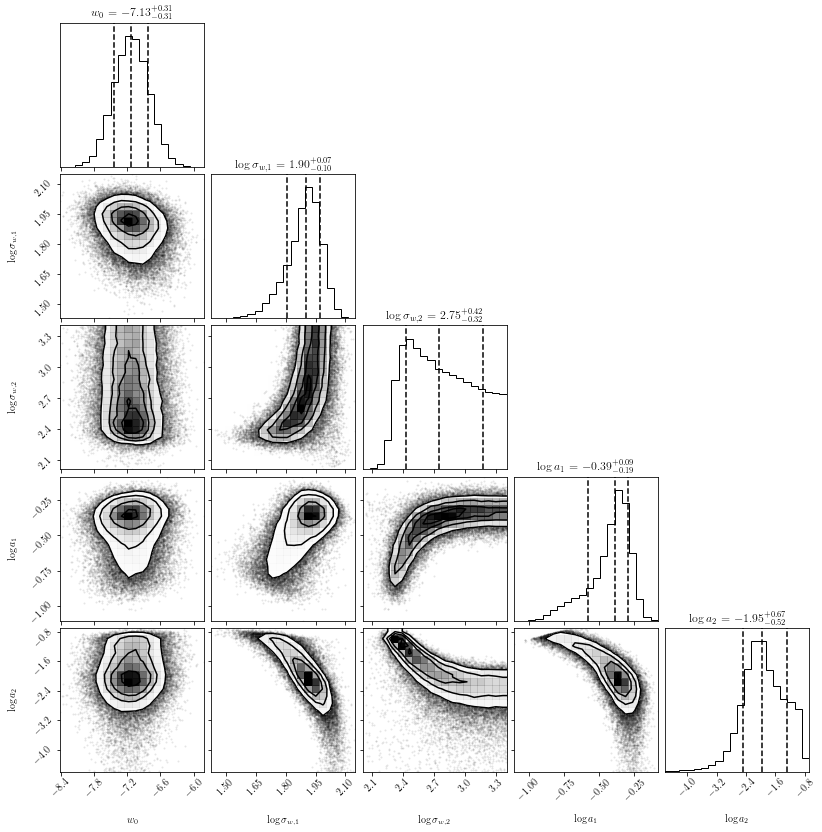

In [87]:
labels = [r'$w_0$', r'$\log \sigma_{w,1}$', r'$\log \sigma_{w,2}$',
          r'$\log a_1$', r'$\log a_2$', r'$\log \Phi$']
labs = ['w0', 'log_sigmaw1', 'log_sigmaw2', 'log_a1', 'log_a2', 'log_phi']
indexes = list(range(len(labs)))
index = 1
chain = np.load(files[index])   
ndim = chain.shape[2]
params = get_params(chain, indexes, labs)
(plot_corner()
 .params(params[:, :, :-1])
 .labels(labels[:-1])
 .run()
)

In [85]:
files

['/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(-0.10)_(0.11).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.11)_(0.16).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.16)_(0.20).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.20)_(0.24).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.24)_(0.27).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.27)_(0.29).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.29)_(0.31).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.31)_(0.33).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.33)_(0.35).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.35)_(0.37).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.37)_(0.38).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.38)_(0.40).npy']

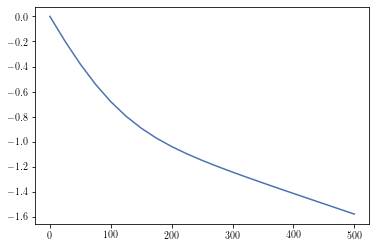

In [90]:
flat_samples = chain.reshape((-1, ndim))

phi_max = 500
phis = np.linspace(0, phi_max, 21)
inds = np.random.randint(0, len(flat_samples), 5000)
log_sigmaw1 = flat_samples[inds[0], 1]
log_sigmaw2 = flat_samples[inds[0], 2]
log_a1 = flat_samples[inds[0], 3]
log_a2 = flat_samples[inds[0], 4]

sigmaw1 = np.exp(log_sigmaw1)
sigmaw2 = np.exp(log_sigmaw2)
a1 = np.exp(log_a1)
a2 = np.exp(log_a2)
atot = a1 + a2

nus = (a1*np.exp(-phis/sigmaw1**2) + a2*np.exp(-phis/sigmaw2**2))/atot

plt.plot(phis, np.log10(nus))
plt.show()

In [92]:
phis = np.linspace(1, phi_max, 1000)
N = len(flat_samples)
print(N)
log_zmod_phi = np.empty((N, len(phis)))
for i in tqdm(range(N)):
    th = flat_samples[i]
    log_sigmaw1 = th[1]
    log_sigmaw2 = th[2]
    log_a1 = th[3]
    log_a2 = th[4]

    sigmaw1 = np.exp(log_sigmaw1)
    sigmaw2 = np.exp(log_sigmaw2)
    a1 = np.exp(log_a1)
    a2 = np.exp(log_a2)
    atot = a1 + a2
    zmod_phi_i = (a1*np.exp(-phis/sigmaw1**2)+a2*np.exp(-phis/sigmaw2**2))/atot
    log_zmod_phi[i] = np.log(zmod_phi_i)
log_zmod_phi

60000


100%|██████████| 60000/60000 [00:04<00:00, 12053.02it/s]


array([[-0.01813615, -0.02718456, -0.03622586, ..., -3.31160919,
        -3.31259137, -3.31357346],
       [-0.02166996, -0.03245188, -0.04320554, ..., -4.29234669,
        -4.29550483, -4.29866297],
       [-0.02121724, -0.03179361, -0.04235544, ..., -4.17171242,
        -4.17415061, -4.17658878],
       ...,
       [-0.01675569, -0.02511248, -0.03346076, ..., -3.55266808,
        -3.55439841, -3.55612863],
       [-0.0171724 , -0.02573542, -0.03428867, ..., -4.31986075,
        -4.32271313, -4.3255654 ],
       [-0.01839484, -0.02756376, -0.03671972, ..., -3.01077158,
        -3.011994  , -3.01321639]])

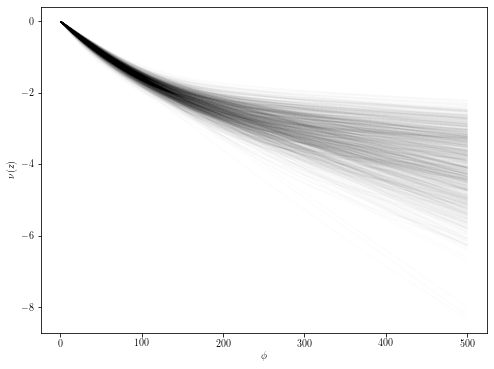

In [93]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(phis, log_zmod_phi[::60].T, 'k', alpha=0.01)
ax.set_xlabel(r'$\phi$')
ax.set_ylabel(r'$\nu(z)$')
plt.show()

<BarContainer object of 94 artists>

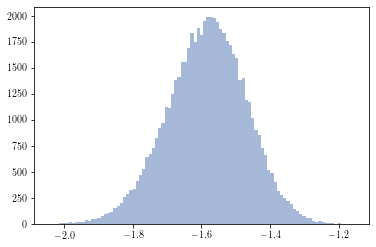

In [95]:
from scipy.stats import median_abs_deviation as mad_func

phi_i = 100
index = np.argmin(np.abs(phis-phi_i))
log_zmod_phi_i = log_zmod_phi[:, index]
med = np.median(log_zmod_phi_i)
mad = mad_func(log_zmod_phi_i)
mask = np.abs(log_zmod_phi_i-med) < 6*mad
log_zmod_phi_i = log_zmod_phi_i[mask]

low = med-6*mad
high = med+6*mad
yedge = np.linspace(low, high, 100)
dy = yedge[1]-yedge[0]
ymid = (yedge[1:]+yedge[:-1])/2
ynum, _ = np.histogram(log_zmod_phi_i, bins=yedge)
# ynum
mask = ynum > 0
ynum = ynum[mask]
ymid = ymid[mask]

# plot
plt.bar(ymid, ynum, width=dy, alpha=0.5)

In [96]:
med = np.median(log_zmod_phi, axis=0)
mad = mad_func(log_zmod_phi, axis=0)
partition = 50
pred = np.empty((len(phis), 2, partition))
phi_mod = phis
for i, (log_zmod_phi_i, med_i, mad_i) in enumerate(zip(log_zmod_phi.T, med, tqdm(mad))):
    mask = np.abs(log_zmod_phi_i-med_i) < 6*mad_i
    log_zmod_phi_i = log_zmod_phi_i[mask]
    low = med_i-6*mad_i
    high = med_i+6*mad_i
    log_znum_edge = np.linspace(low, high, partition+1)
    dy = log_znum_edge[1]-log_znum_edge[0]
    log_znum_mod = (log_znum_edge[1:]+log_znum_edge[:-1])/2
    znum_weight, _ = np.histogram(log_zmod_phi_i, bins=log_znum_edge)
    total = znum_weight.sum()
    znum_weight = znum_weight/total
    pred_i = np.array([np.exp(log_znum_mod), znum_weight])
    pred[i] = pred_i

100%|█████████▉| 999/1000 [00:04<00:00, 204.51it/s]


# automate

In [115]:
from utils import get_data

In [98]:
# check memory size of pred
pred.nbytes/1024**2 # MB

0.762939453125

In [102]:
files

['/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(-0.10)_(0.11).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.11)_(0.16).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.16)_(0.20).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.20)_(0.24).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.24)_(0.27).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.27)_(0.29).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.29)_(0.31).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.31)_(0.33).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.33)_(0.35).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.35)_(0.37).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.37)_(0.38).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.38)_(0.40).npy']

In [113]:
z_dir_path = join(root_data_dir, "Effective-Volume-no")
z_files = glob(join(z_dir_path, "gaia*"))
z_files.sort()
# for file in z_files:
#     df = vaex.open(file)
#     break
# df

In [103]:
data_dir

'/home2/s20321005/Thesis-Project/Data/PHI'

(-0.10)_(0.11).npy
ANJING (54000, 5)
TAI ['$w_0$', '$\\log \\sigma_{w,1}$', '$\\log \\sigma_{w,2}$', '$\\log a_1$', '$\\log a_2$']


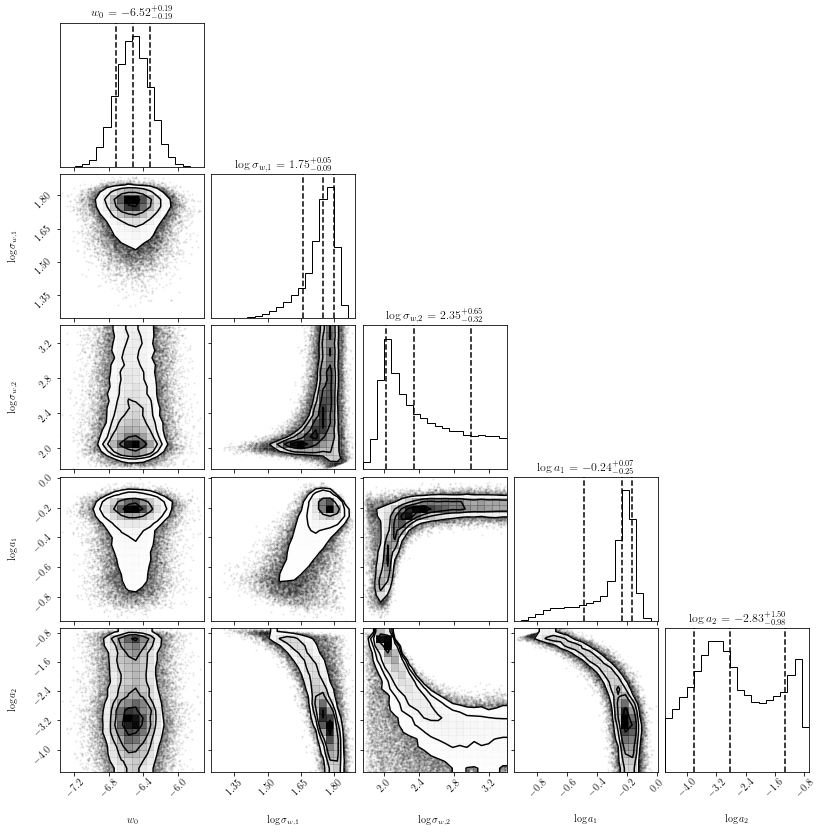

calculating nz...


100%|██████████| 54000/54000 [00:04<00:00, 12327.02it/s]


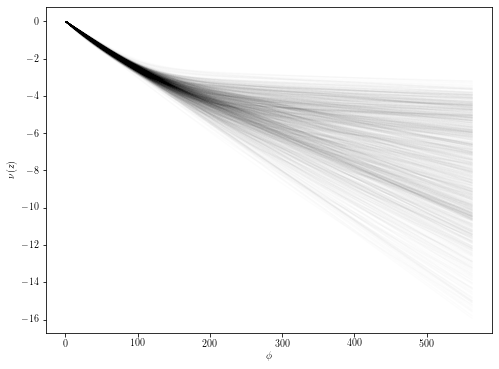

calculating histogram...


 90%|████████▉ | 899/1000 [00:04<00:00, 224.91it/s]

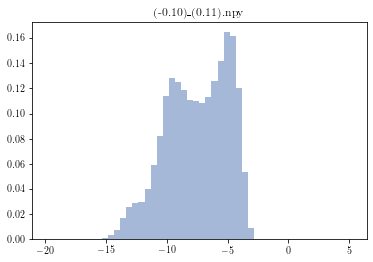

100%|█████████▉| 999/1000 [00:04<00:00, 208.82it/s]


done (-0.10)_(0.11).npy



(0.11)_(0.16).npy
ANJING (60000, 5)
TAI ['$w_0$', '$\\log \\sigma_{w,1}$', '$\\log \\sigma_{w,2}$', '$\\log a_1$', '$\\log a_2$']


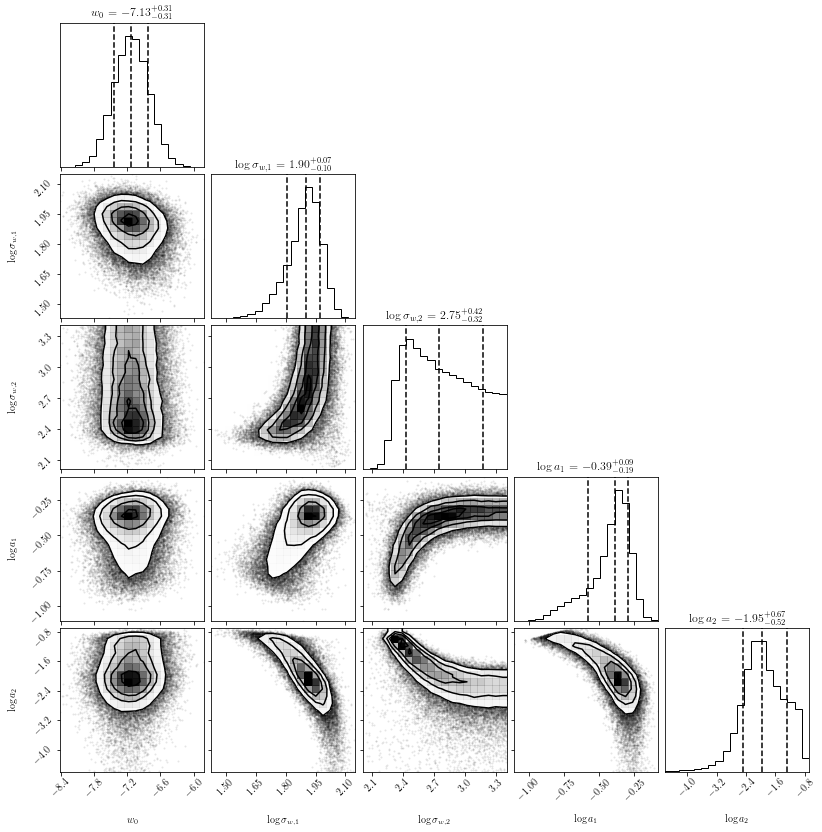

calculating nz...


100%|██████████| 60000/60000 [00:04<00:00, 12410.92it/s]


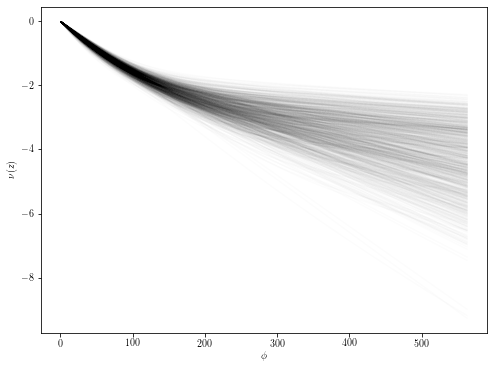

calculating histogram...


 89%|████████▉ | 891/1000 [00:05<00:00, 138.70it/s]

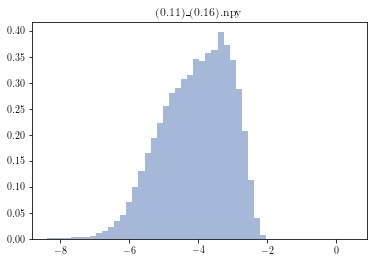

100%|█████████▉| 999/1000 [00:07<00:00, 139.74it/s]


done (0.11)_(0.16).npy



(0.16)_(0.20).npy
ANJING (58000, 5)
TAI ['$w_0$', '$\\log \\sigma_{w,1}$', '$\\log \\sigma_{w,2}$', '$\\log a_1$', '$\\log a_2$']


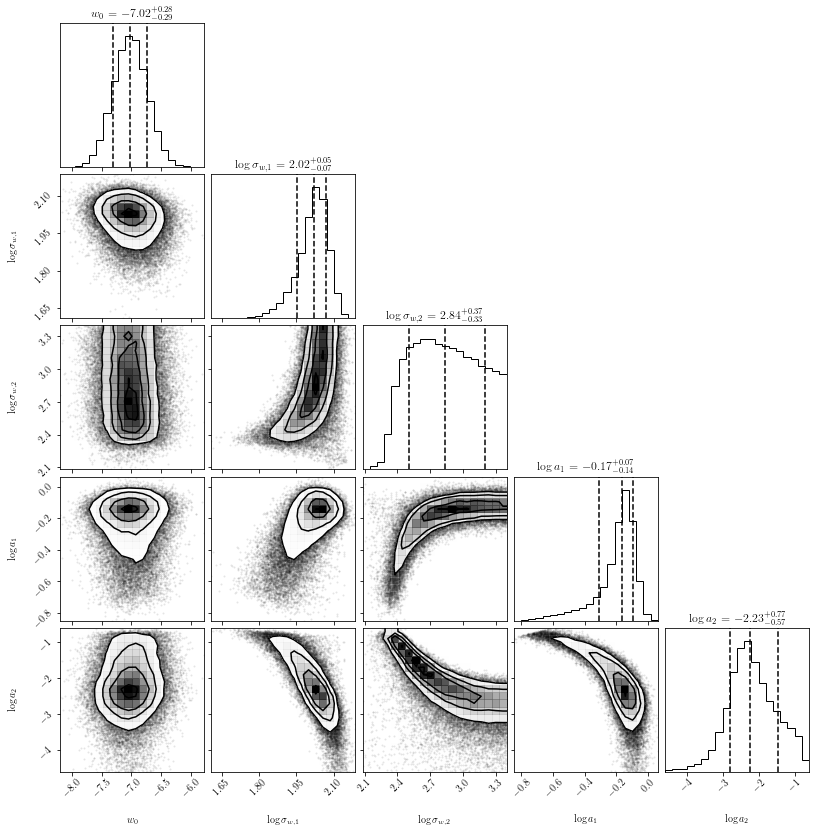

calculating nz...


100%|██████████| 58000/58000 [00:08<00:00, 6874.55it/s]


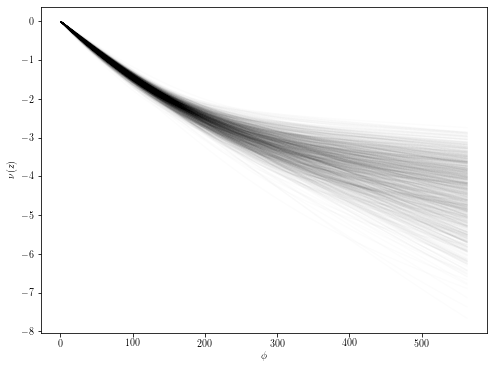

calculating histogram...


 89%|████████▉ | 891/1000 [00:05<00:00, 209.65it/s]

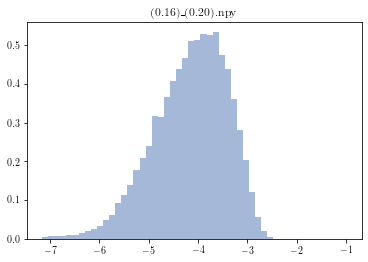

100%|█████████▉| 999/1000 [00:06<00:00, 155.63it/s]


done (0.16)_(0.20).npy



(0.20)_(0.24).npy
ANJING (60000, 5)
TAI ['$w_0$', '$\\log \\sigma_{w,1}$', '$\\log \\sigma_{w,2}$', '$\\log a_1$', '$\\log a_2$']


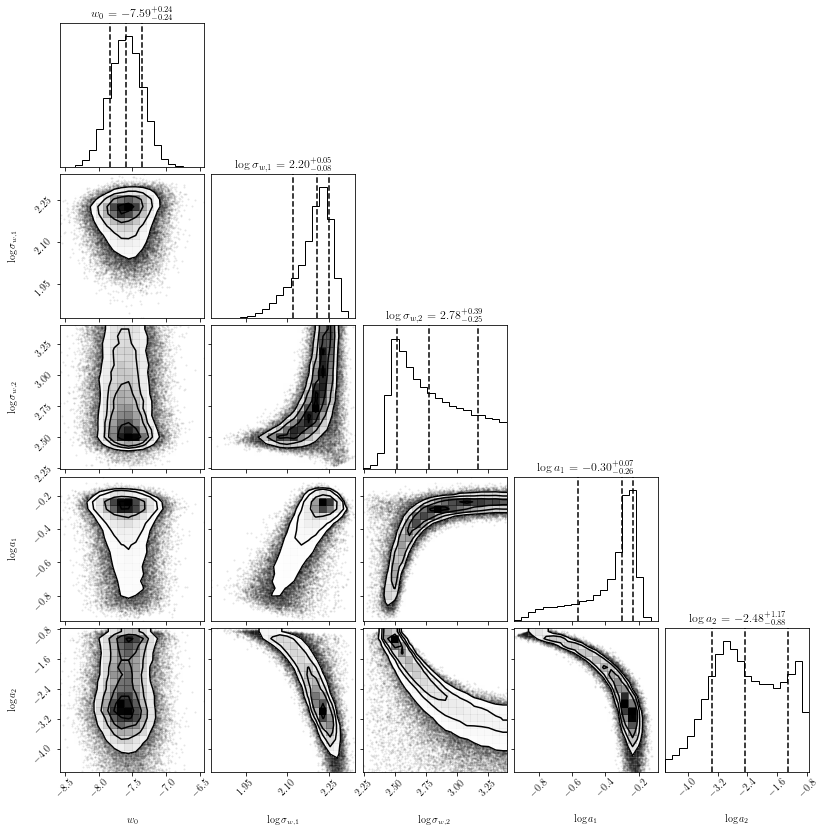

calculating nz...


100%|██████████| 60000/60000 [00:09<00:00, 6286.46it/s]


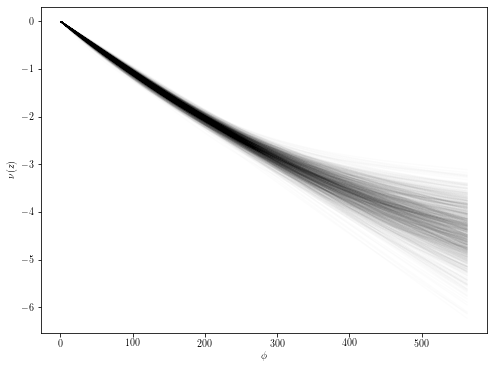

calculating histogram...


 90%|████████▉ | 896/1000 [00:06<00:00, 137.45it/s]

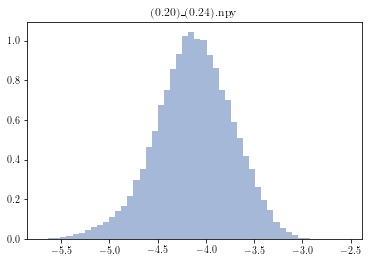

100%|█████████▉| 999/1000 [00:08<00:00, 121.45it/s]


done (0.20)_(0.24).npy



(0.24)_(0.27).npy
ANJING (56000, 5)
TAI ['$w_0$', '$\\log \\sigma_{w,1}$', '$\\log \\sigma_{w,2}$', '$\\log a_1$', '$\\log a_2$']


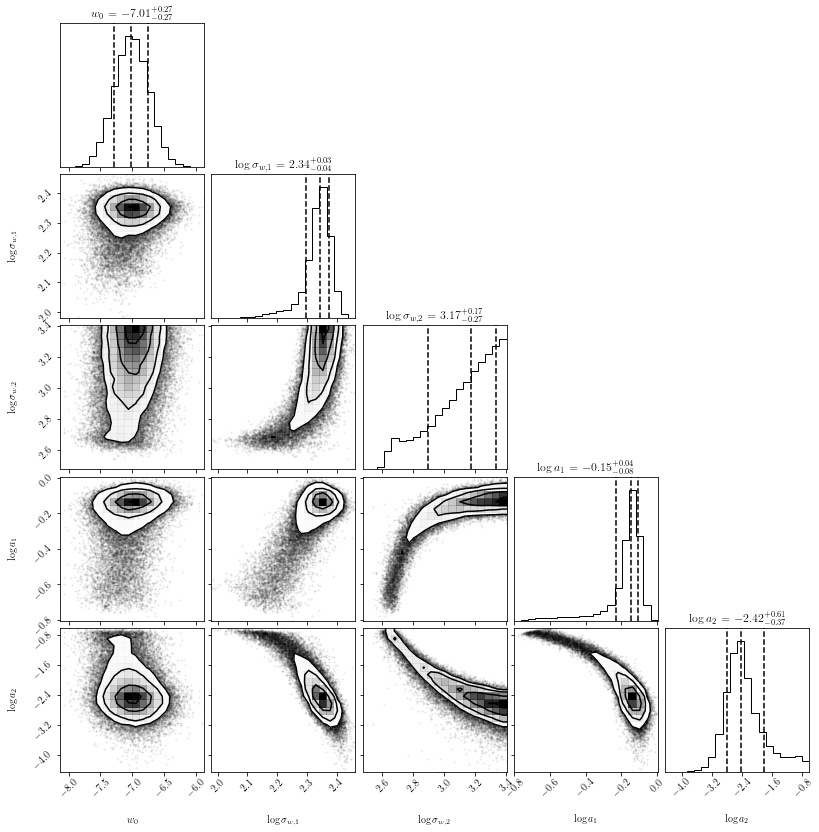

calculating nz...


100%|██████████| 56000/56000 [00:09<00:00, 6201.30it/s]


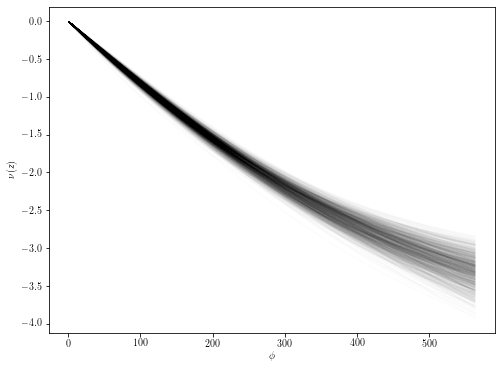

calculating histogram...


 89%|████████▊ | 887/1000 [00:06<00:00, 140.90it/s]

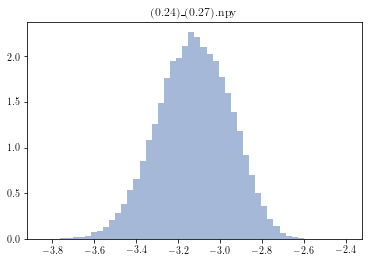

100%|█████████▉| 999/1000 [00:07<00:00, 126.73it/s]


done (0.24)_(0.27).npy



(0.27)_(0.29).npy
ANJING (60000, 5)
TAI ['$w_0$', '$\\log \\sigma_{w,1}$', '$\\log \\sigma_{w,2}$', '$\\log a_1$', '$\\log a_2$']


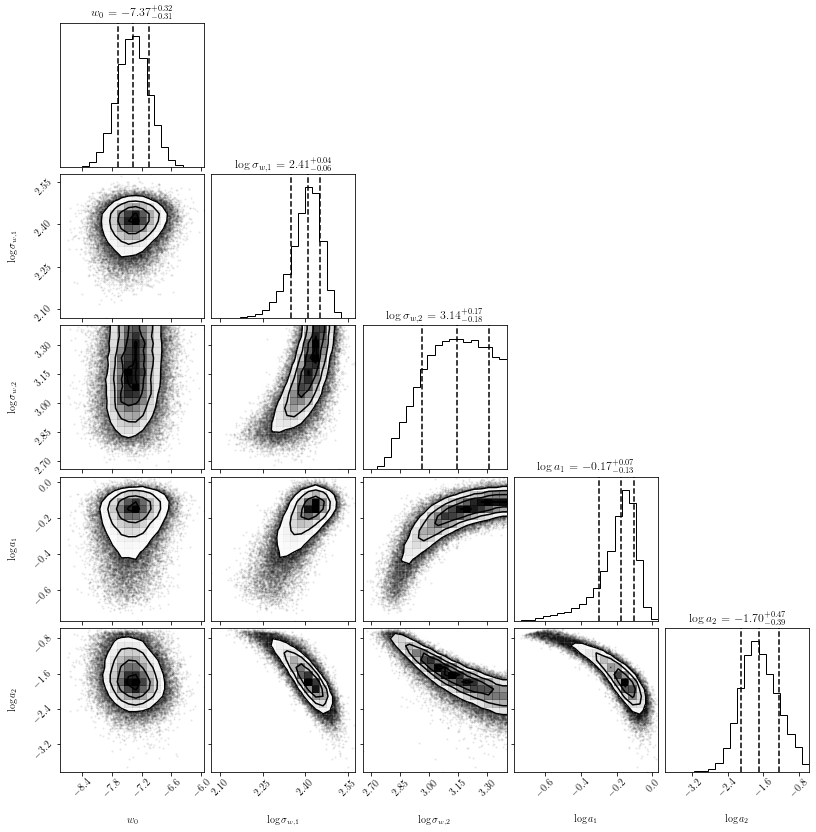

calculating nz...


100%|██████████| 60000/60000 [00:09<00:00, 6259.89it/s]


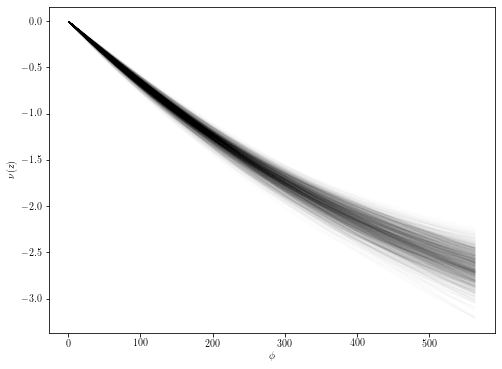

calculating histogram...


 90%|████████▉ | 899/1000 [00:06<00:00, 171.84it/s]

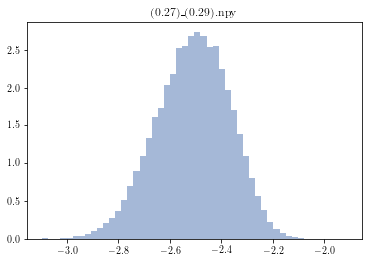

100%|█████████▉| 999/1000 [00:08<00:00, 124.12it/s]


done (0.27)_(0.29).npy



(0.29)_(0.31).npy
ANJING (60000, 5)
TAI ['$w_0$', '$\\log \\sigma_{w,1}$', '$\\log \\sigma_{w,2}$', '$\\log a_1$', '$\\log a_2$']


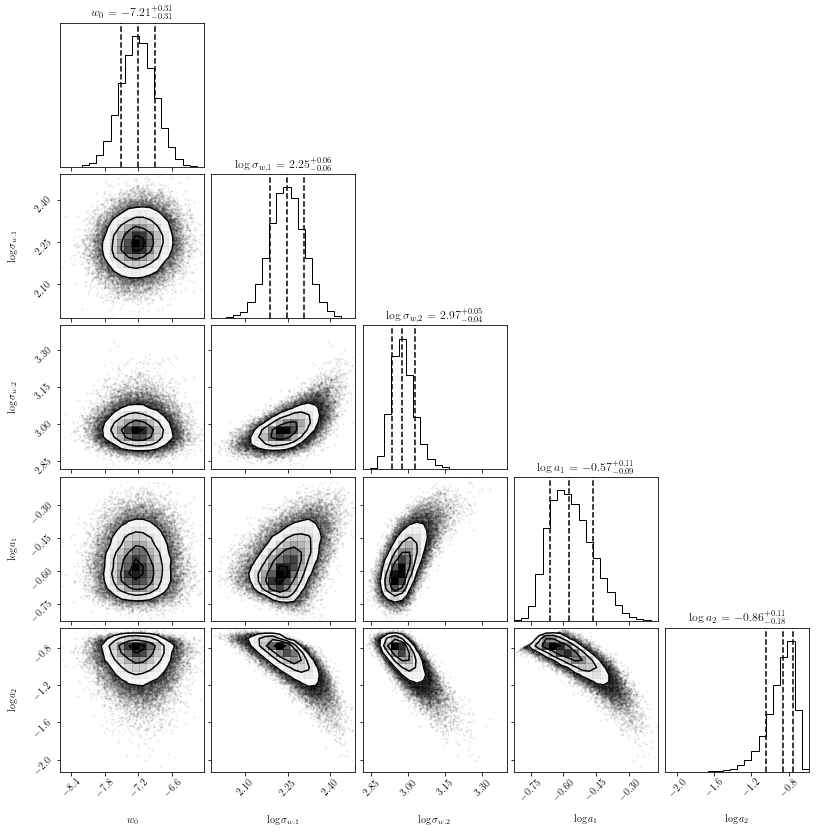

calculating nz...


100%|██████████| 60000/60000 [00:09<00:00, 6188.07it/s]


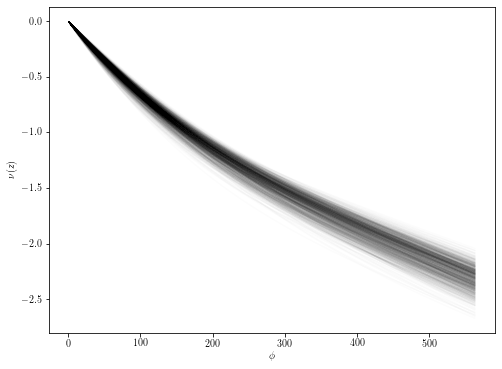

calculating histogram...


 89%|████████▉ | 888/1000 [00:06<00:00, 137.74it/s]

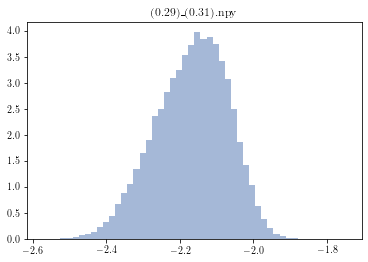

100%|█████████▉| 999/1000 [00:08<00:00, 124.12it/s]


done (0.29)_(0.31).npy



(0.31)_(0.33).npy
ANJING (60000, 5)
TAI ['$w_0$', '$\\log \\sigma_{w,1}$', '$\\log \\sigma_{w,2}$', '$\\log a_1$', '$\\log a_2$']


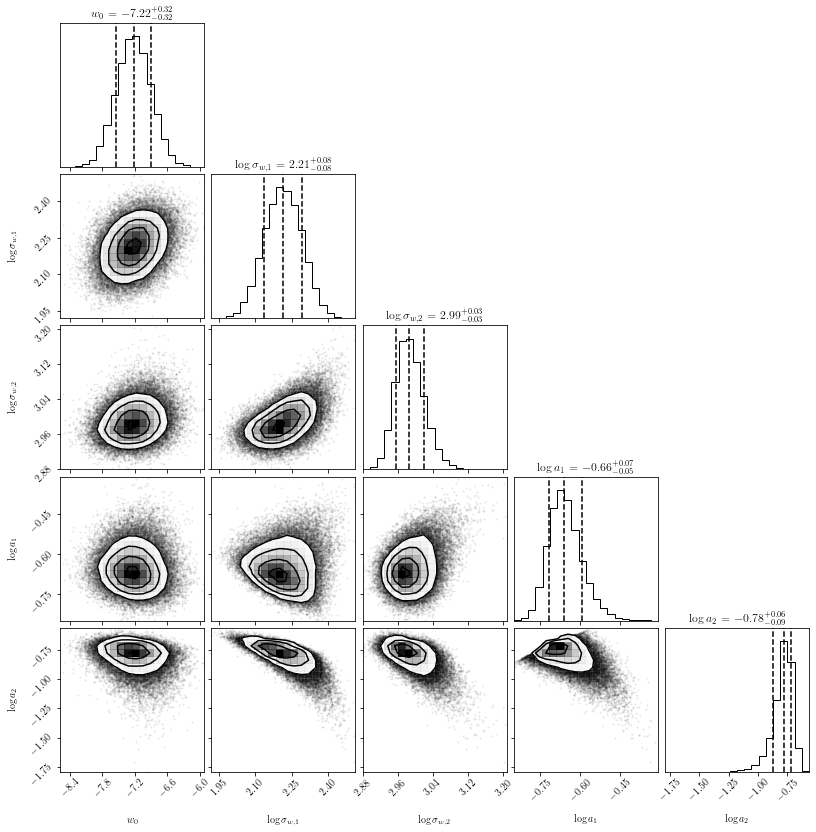

calculating nz...


100%|██████████| 60000/60000 [00:09<00:00, 6203.95it/s]


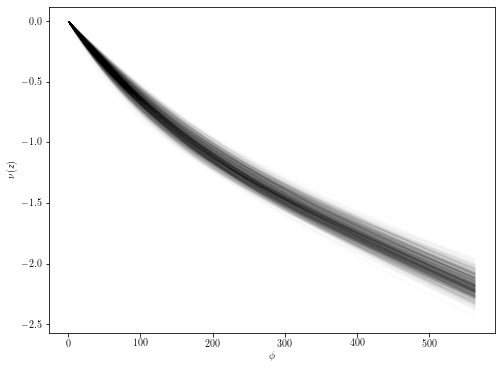

calculating histogram...


 90%|████████▉ | 897/1000 [00:06<00:00, 136.04it/s]

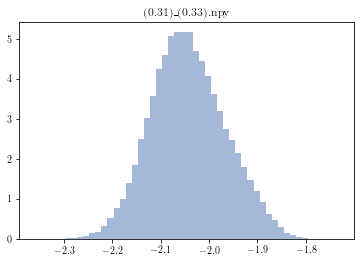

100%|█████████▉| 999/1000 [00:08<00:00, 122.56it/s]


done (0.31)_(0.33).npy



(0.33)_(0.35).npy
ANJING (60000, 5)
TAI ['$w_0$', '$\\log \\sigma_{w,1}$', '$\\log \\sigma_{w,2}$', '$\\log a_1$', '$\\log a_2$']


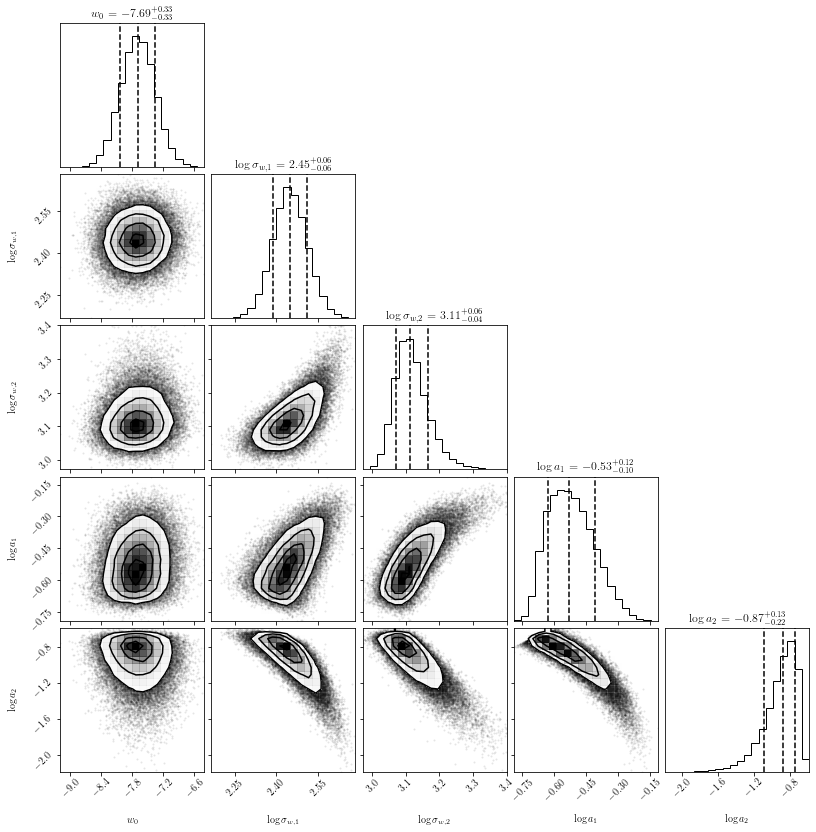

calculating nz...


100%|██████████| 60000/60000 [00:09<00:00, 6223.19it/s]


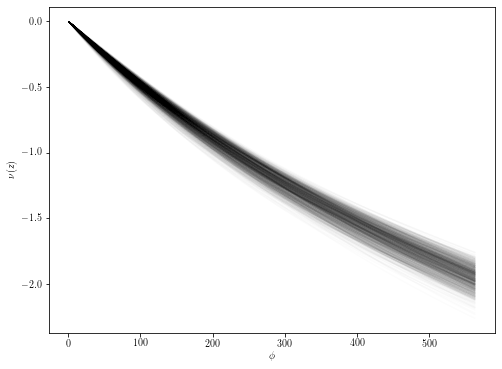

calculating histogram...


 89%|████████▉ | 888/1000 [00:06<00:00, 135.85it/s]

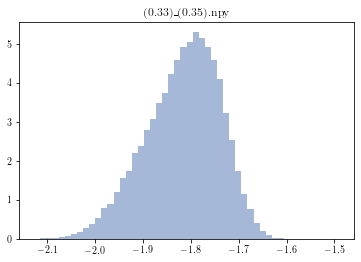

100%|█████████▉| 999/1000 [00:08<00:00, 123.13it/s]


done (0.33)_(0.35).npy



(0.35)_(0.37).npy
ANJING (58000, 5)
TAI ['$w_0$', '$\\log \\sigma_{w,1}$', '$\\log \\sigma_{w,2}$', '$\\log a_1$', '$\\log a_2$']


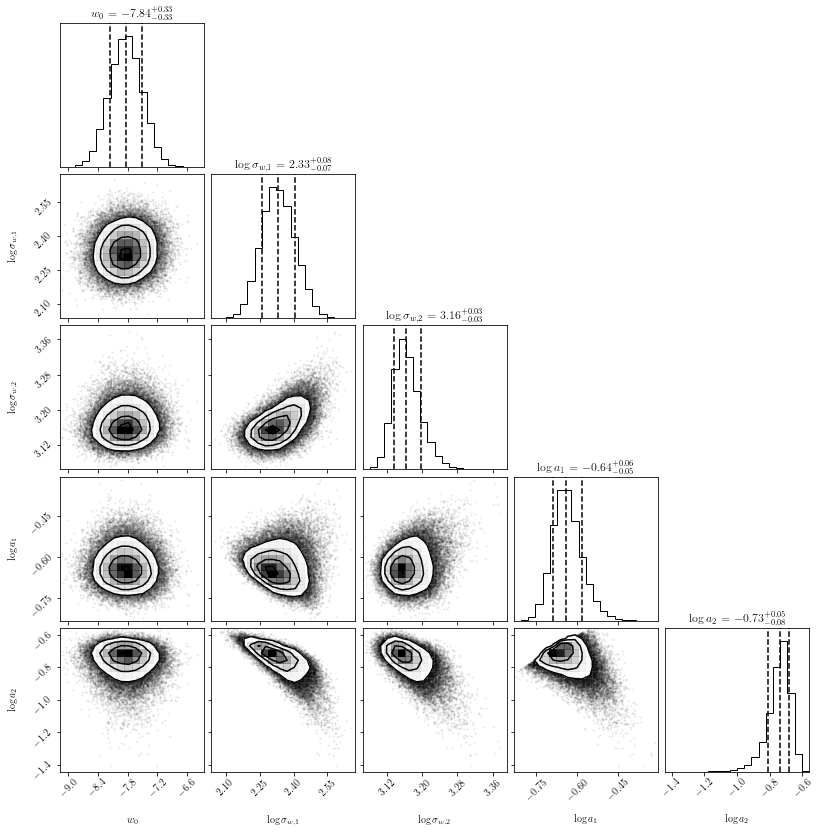

calculating nz...


100%|██████████| 58000/58000 [00:09<00:00, 6275.89it/s]


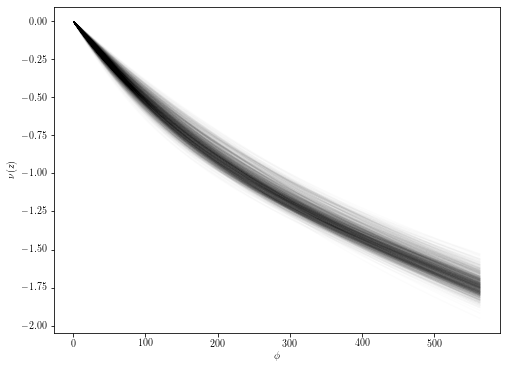

calculating histogram...


 90%|████████▉ | 899/1000 [00:06<00:00, 141.50it/s]

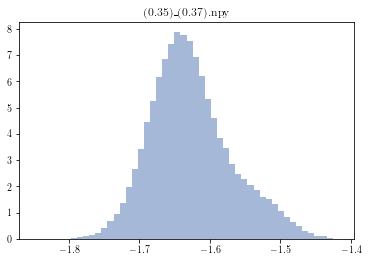

100%|█████████▉| 999/1000 [00:07<00:00, 125.12it/s]


done (0.35)_(0.37).npy



(0.37)_(0.38).npy
ANJING (60000, 5)
TAI ['$w_0$', '$\\log \\sigma_{w,1}$', '$\\log \\sigma_{w,2}$', '$\\log a_1$', '$\\log a_2$']


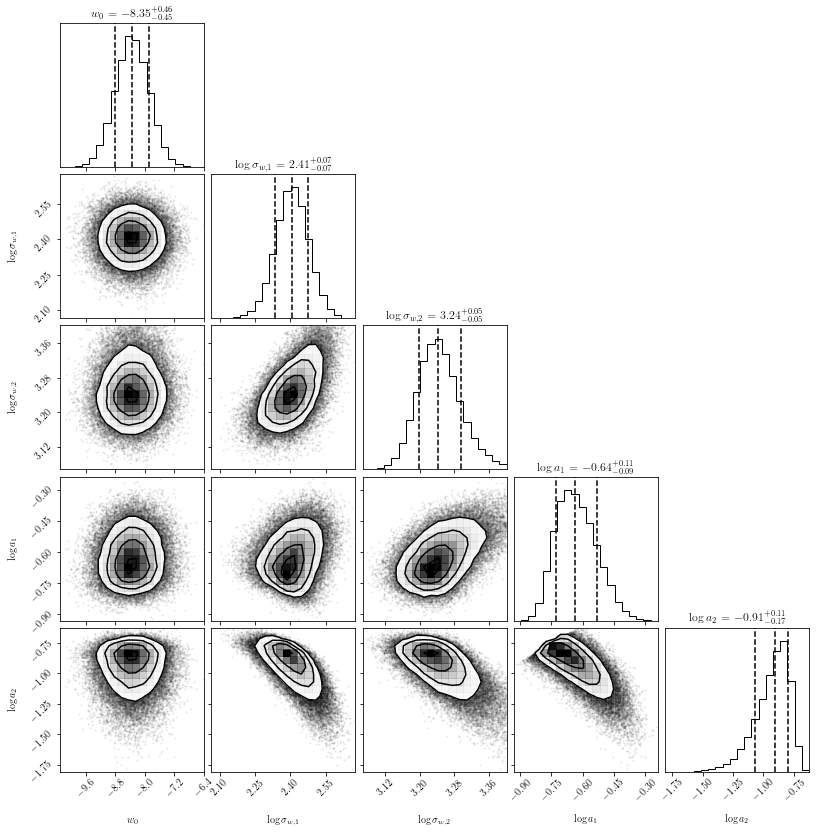

calculating nz...


100%|██████████| 60000/60000 [00:09<00:00, 6246.68it/s]


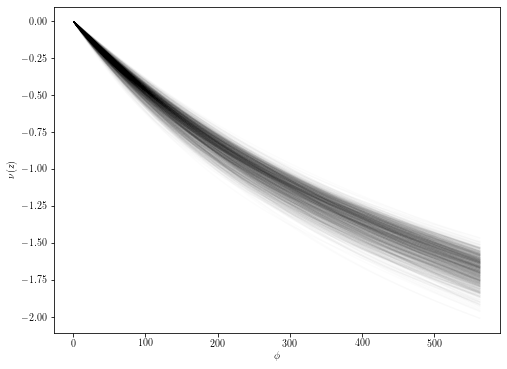

calculating histogram...


 90%|████████▉ | 898/1000 [00:06<00:00, 136.93it/s]

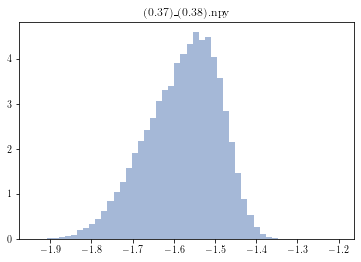

100%|█████████▉| 999/1000 [00:08<00:00, 120.46it/s]


done (0.37)_(0.38).npy



(0.38)_(0.40).npy
ANJING (60000, 5)
TAI ['$w_0$', '$\\log \\sigma_{w,1}$', '$\\log \\sigma_{w,2}$', '$\\log a_1$', '$\\log a_2$']


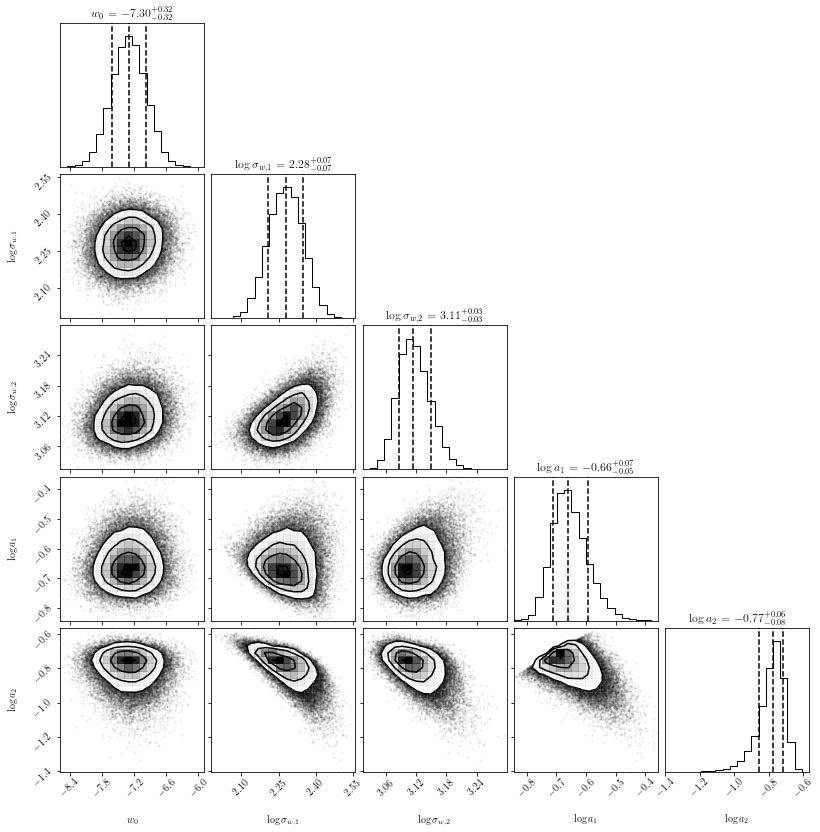

calculating nz...


100%|██████████| 60000/60000 [00:09<00:00, 6222.99it/s]


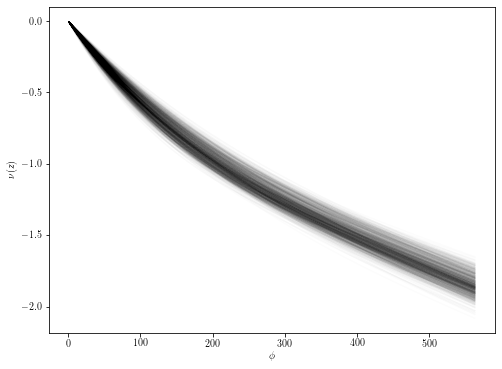

calculating histogram...


 90%|████████▉ | 897/1000 [00:06<00:00, 137.14it/s]

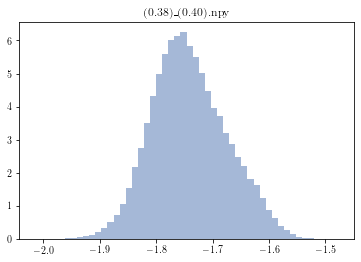

100%|█████████▉| 999/1000 [00:08<00:00, 121.35it/s]

done (0.38)_(0.40).npy





In [118]:
labels = [r'$w_0$', r'$\log \sigma_{w,1}$', r'$\log \sigma_{w,2}$',
          r'$\log a_1$', r'$\log a_2$', r'$\log \Phi$']
labs = ['w0', 'log_sigmaw1', 'log_sigmaw2', 'log_a1', 'log_a2', 'log_phi']
indexes = list(range(len(labs)))

for ind, file in enumerate(files):
    name = file.split('/')[-1].replace("chain-", "")
    print(name)
    chain = np.load(file)
    ndim = chain.shape[2]
    params = get_params(chain, indexes, labs)
    (plot_corner()
       .params(params[:, :, :-1])
       .labels(labels[:-1])
       .run()
    )
    flat_samples = chain.reshape((-1, ndim))
    zdata = get_data(z_dir_path, ind, "z")
    phi_max = np.max(np.abs(zdata[0]))*1.5
    phis = np.linspace(1, phi_max, 1000)
    N = len(flat_samples)
    log_zmod_phi = np.empty((N, len(phis)))
    print("calculating nz...")
    for i in tqdm(range(N)):
        th = flat_samples[i]
        log_sigmaw1 = th[1]
        log_sigmaw2 = th[2]
        log_a1 = th[3]
        log_a2 = th[4]

        sigmaw1 = np.exp(log_sigmaw1)
        sigmaw2 = np.exp(log_sigmaw2)
        a1 = np.exp(log_a1)
        a2 = np.exp(log_a2)
        atot = a1 + a2
        zmod_phi_i = (a1*np.exp(-phis/sigmaw1**2)+a2*np.exp(-phis/sigmaw2**2))/atot
        log_zmod_phi[i] = np.log(zmod_phi_i)
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(phis, log_zmod_phi[::60].T, 'k', alpha=0.01)
    ax.set_xlabel(r'$\phi$')
    ax.set_ylabel(r'$\nu(z)$')
    plt.show()
    med = np.median(log_zmod_phi, axis=0)
    mad = mad_func(log_zmod_phi, axis=0)
    partition = 50
    pred = np.empty((len(phis), 2, partition))
    print("calculating histogram...")
    for i, (log_zmod_phi_i, med_i, mad_i) in enumerate(zip(log_zmod_phi.T, med, tqdm(mad))):
        mask = np.abs(log_zmod_phi_i-med_i) < 6*mad_i
        log_zmod_phi_i = log_zmod_phi_i[mask]
        low = med_i-6*mad_i
        high = med_i+6*mad_i
        log_znum_edge = np.linspace(low, high, partition+1)
        dy = log_znum_edge[1]-log_znum_edge[0]
        log_znum_mod = (log_znum_edge[1:]+log_znum_edge[:-1])/2
        znum_weight, _ = np.histogram(log_zmod_phi_i, bins=log_znum_edge)
        area = znum_weight.sum()*dy
        znum_weight = znum_weight/area
        pred_i = np.array([np.exp(log_znum_mod), znum_weight])
        pred[i] = pred_i
        if i == 900:
            plt.bar(log_znum_mod, znum_weight, width=dy, alpha=0.5)
            plt.title(name)
            plt.show()
    np.save(join(data_dir, "pred_"+name), pred)
    np.save(join(data_dir, "phi_"+name), phis)
    print("done", name)
    print("\n\n")